In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import xml.etree.ElementTree as ET
import copy

In [6]:
### process every xml files to be 'filename':[[xmin_room1,xmax_room1,ymin_room1,ymax_room1,label_room1],
### [xmin_room2,xmax_room2,ymin_room2,ymax_room2,label_room2],...]

directName = "./"
script_dict = {}   ### record of each figure and each room of it
room_dict = {}     ### labels for different room: living room, bedroom, ...
for file in os.listdir(directName):
    if file.endswith(".xml"):
        fileNamePre = file[:-4]
        tree = ET.parse(os.path.join(directName, file))
        root = tree.getroot()
        script_dict[fileNamePre] = []
        for item in root.findall('object'):
            rooms = [None]*5
            for child in item:
                if(child.tag == 'name'):
                    room_type = child.text
                    room_type_digit = -1
                    if(room_type in room_dict):
                        room_type_digit = room_dict[room_type]
                    else:
                        room_type_digit = len(room_dict)
                        room_dict[room_type] = room_type_digit 
                    rooms[4] = room_type_digit
                elif(child.tag == 'bndbox'):
                    for grandchild in child:
                        if grandchild.tag=='xmin':
                            rooms[0] = int(grandchild.text)
                        elif grandchild.tag=='xmax':
                            rooms[1] = int(grandchild.text)
                        elif grandchild.tag=='ymin':
                            rooms[2] = int(grandchild.text)
                        elif grandchild.tag=='ymax':
                            rooms[3] = int(grandchild.text)
            script_dict[fileNamePre].append(rooms)

In [17]:
script_dict[list(script_dict.keys())[0]]

[[975, 1200, 823, 955, 0],
 [721, 946, 824, 1092, 1],
 [719, 1102, 1118, 1579, 2],
 [1562, 1875, 968, 1302, 2],
 [1134, 1532, 1107, 1575, 3],
 [1236, 1538, 819, 1105, 4],
 [1559, 1879, 737, 940, 5]]

In [19]:
room_dict

{'storage': 0,
 'bathroom': 1,
 'bedroom': 2,
 'living room': 3,
 'dining room': 4,
 'kitchen': 5,
 'stairs': 6,
 'balcony': 7,
 'garage': 8}

In [21]:
script_dict.keys()

dict_keys(['0134b1-1', '0134b2-1', '0134b2-2', '0134b3-1', '0134b3-2'])

In [ ]:
def augment_fig(filename, directName, script_dict, outputfig=False):
    img  = cv2.imread(os.path.join(directName, filename+'.png'), cv2.IMREAD_GRAYSCALE)
    labels = script_dict[filename]
    ### row symmetric
    img_xs = np.flipud(img)
    labels_xs = copy.deepcopy(labels)
    for room in labels_xs:
        room[2] = img.shape[0] - room[2]
        room[3] = img.shape[0] - room[3]

    ### col symmetric
    img_ys = np.fliplr(img)
    labels_ys = copy.deepcopy(labels)
    for room in labels_ys:
        room[0] = img.shape[1] - room[0]
        room[1] = img.shape[1] - room[1]

        
        

    ### 90 degree rotation
    img_90r = np.rot90(img)
    labels_90r = copy.deepcopy(labels)
    for room in labels_90r:
        temp1 = room[0]
        temp2 = room[1]
        room[0] = room[2]
        room[1] = room[3]
        room[2] = img.shape[1] - temp1
        room[3] = img.shape[1] - temp2

        
    
    ### 180 degree rotation
    img_180r = np.rot90(img,2)
    labels_180r = copy.deepcopy(labels)
    for room in labels_180r:
        room[0] = img.shape[1] - room[0]
        room[1] = img.shape[1] - room[1]
        room[2] = img.shape[0] - room[2]
        room[3] = img.shape[0] - room[3]

        
        
    ### 270 degree rotation
    img_270r = np.rot90(img,3)
    labels_270r = copy.deepcopy(labels)
    for room in labels_270r:
        temp1 = room[0]
        temp2 = room[1]
        room[0] = img.shape[0] - room[2]
        room[1] = img.shape[0] - room[3]
        room[2] = temp1
        room[3] = temp2

        
    if(outputfig):
        plt.figure(figsize = (50,40))
        
        plt.subplot(2,3,1)
        plt.pcolormesh(img, cmap ='gist_gray')
        for room in labels:
            plt.plot(room[0],room[2],'ro')
            plt.plot(room[1],room[3],'ro')
        
        plt.subplot(2,3,2)
        plt.pcolormesh(img_xs, cmap ='gist_gray')
        for room in labels_xs:
            plt.plot(room[0],room[2],'ro')
            plt.plot(room[1],room[3],'ro')
            
        plt.subplot(2,3,3)
        plt.pcolormesh(img_ys, cmap ='gist_gray')
        for room in labels_ys:
            plt.plot(room[0],room[2],'ro')
            plt.plot(room[1],room[3],'ro')
            
        plt.subplot(2,3,4)
        plt.pcolormesh(img_90r, cmap ='gist_gray')
        for room in labels_90r:
            plt.plot(room[0],room[2],'ro')
            plt.plot(room[1],room[3],'ro')
            
        
        plt.subplot(2,3,5)
        plt.pcolormesh(img_180r, cmap ='gist_gray')
        for room in labels_180r:
            plt.plot(room[0],room[2],'ro')
            plt.plot(room[1],room[3],'ro')
            
            
        plt.subplot(2,3,6)
        plt.pcolormesh(img_270r, cmap ='gist_gray')
        for room in labels_270r:
            plt.plot(room[0],room[2],'ro')
            plt.plot(room[1],room[3],'ro')
        
        plt.savefig(os.path.join(directName, filename+'_aug.png'))
        plt.close()

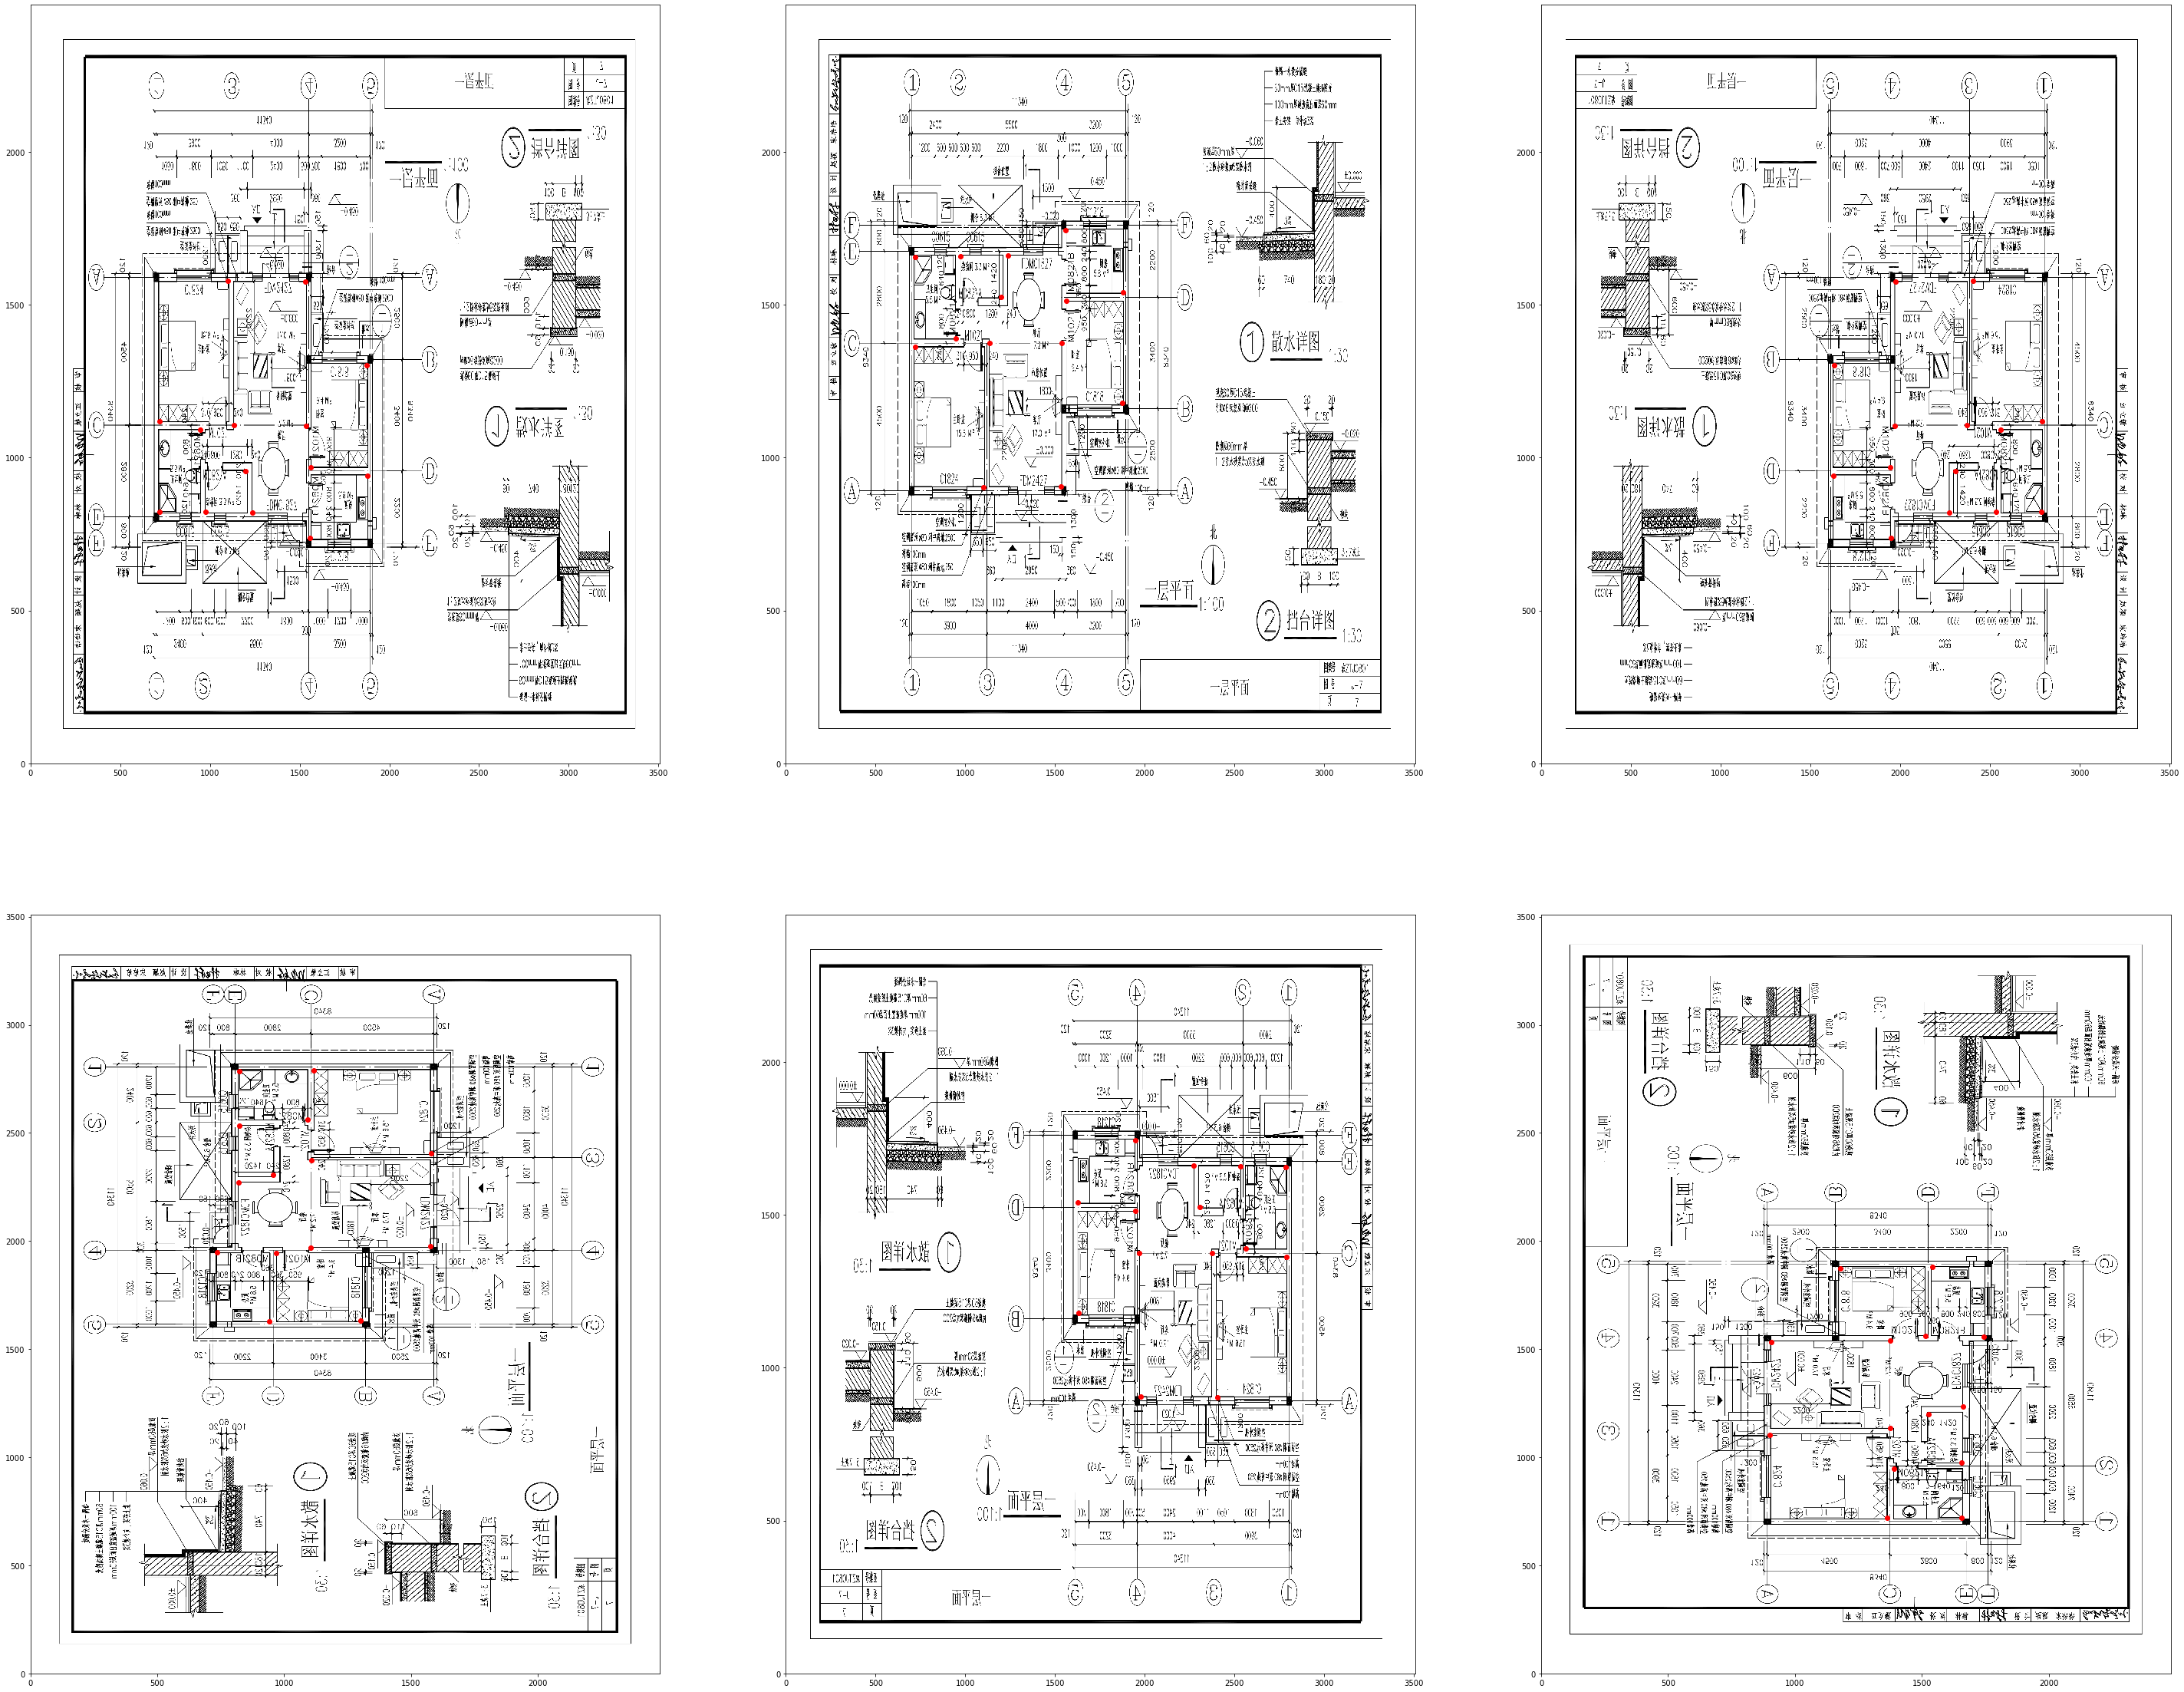

In [36]:
augment_fig('0134b1-1', directName, script_dict, True)

In [ ]:


for file in os.listdir(directName):
    if file.endswith(".xml"):
        fileNamePre = file[:-4]
        augment_fig(fileNamePre, directName, script_dict, True)
